# Fraud Detection - Making a hybrid Deep Learning Model

## Part 1 - SOM

### Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [32]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

### Feature Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) #values range i.e. 0-1
X = sc.fit_transform(X)
# all the values will be converted in between 0-1 (normalization)

### Training the SOM

In [34]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
# x,y= dimensions of the grid
# input_len= no. of features in X (i.e. 15)
# sigma= radius of the different neighbourhood in the grid 1.0 is default value
# learning_rate=Decides how much the weights are updated during each iteration higher the rate faster the conversions 
#               0.5 default value
som.random_weights_init(X) # method to initialize the weights
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

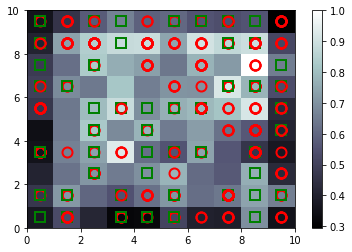

In [35]:
from pylab import bone, pcolor, colorbar, plot, show
bone()  # to initialize the figure/window
pcolor(som.distance_map().T)  # All the values of mean inter-neuron distances in 1 metrix .T to take the transpose
colorbar()  # legend function
markers = ['o', 's']  # o for circle and s for square
colors = ['r', 'g']  # red for not approved green for approved
for i, x in enumerate(X): # to iterate over every customer- i is index of row, x is diffeerent vectors of customers i.e 
#                           vector of row containing index i 
    w = som.winner(x)  # winning node of the customer
    plot(w[0] + 0.5, # add 0.5 to put the marker at the centre of square in grid, w[0]&w[1] are the coordinates of winning 
         w[1] + 0.5, # node
         markers[y[i]], # dependent values of the customer having index i if y=0 then circle 1=square
         markeredgecolor = colors[y[i]], # to colour only edge of the marker
         markerfacecolor = 'None', # to get inside colour of the marker
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [38]:
mappings = som.win_map(X)  # returns the dictionary of all the mappings from winning node to customers
frauds = np.concatenate((mappings[(7,6)],mappings[(8,6)]), axis = 0) # 0 means vertically
# (7,6) & (8,6) are the co-ordinates of points closest to white colour(1) i.e. frauds
frauds = sc.inverse_transform(frauds)

In [39]:
mappings

defaultdict(list,
            {(0,
              5): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
            

In [40]:
frauds[0:2]

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00]])

### Printing the Fraud Clients

In [41]:
a=[]
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))
    a.append(int(i))
print("Total no. of fraud customers :", len(a))

Fraud Customer IDs
15786237
15767358
15671014
15579583
15740487
15593345
15811742
15702571
15646190
15715907
15768342
15748532
15689692
15672357
15788634
15680643
15692137
15796569
15712877
15740458
15807546
15773869
15796111
15809800
15676909
15802071
15790630
15750055
15679801
15748499
15781975
15770255
15773789
15794868
15705506
15812470
Total no. of fraud customers : 36


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Create Matrix of Features

In [153]:
customers = dataset.iloc[:, 1:].values

In [154]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

### Create Dependent Variable

In [155]:
is_fraud = np.zeros(len(dataset))  # create a vector of zeros of 690 elements i.e. vector having 690 zeors
is_fraud[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [156]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:  # i corresponds to ith row and 0 corresponds to column of customer id
        # it will check if the given customer id is in list of fraud customer id which we have obtained using som
        # if it is in list of frauds it will assign 1 to the corresponding valuse of customer id in is_fraud list
        is_fraud[i] = 1

In [157]:
is_fraud[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Part 3 - ANN
### Feature Scaling

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

### Import Tensorflow

In [159]:
import tensorflow as tf
tf.__version__

'2.9.1'

### Initializing the ANN

In [160]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [161]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim=15))  #dimesion of input is 15 i.e. features

### Adding the output layer

In [162]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

### Compiling the ANN

In [163]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [164]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 3s 3ms/step - loss: 0.4596 - accuracy: 0.8319
Epoch 2/10
690/690 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9449
Epoch 3/10
690/690 [==============================] - 2s 3ms/step - loss: 0.2178 - accuracy: 0.9478
Epoch 4/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1831 - accuracy: 0.9478
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1581 - accuracy: 0.9478
Epoch 6/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1387 - accuracy: 0.9478
Epoch 7/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1231 - accuracy: 0.9478
Epoch 8/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1115 - accuracy: 0.9478
Epoch 9/10
690/690 [==============================] - 2s 2ms/step - loss: 0.1016 - accuracy: 0.9478
Epoch 10/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0908 - accuracy: 0.9478

### Predicting test set results

In [198]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 5ms/step


### Creating Dataframe

In [201]:
b=pd.DataFrame(y_pred,columns=['Customer_Id','Fraud_Probability '])

#### Customers with highest probability of being fraud

In [202]:
b.tail(20)

,Customer_Id,Fraud_Probability
670,15770255.0,0.338667
671,15748499.0,0.342961
672,15796569.0,0.343953
673,15579583.0,0.349879
674,15672357.0,0.349931
675,15668830.0,0.356812
676,15583067.0,0.363270
677,15585928.0,0.370984
678,15807546.0,0.371273
679,15740458.0,0.376127
